<a href="https://colab.research.google.com/github/AndreasAvgou/Dermoscopic-Melanoma-Image-Classification/blob/master/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation, Dropout, Flatten, Dense
from keras import backend as K 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,classification_report
import itertools
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_root = ('/content/drive/MyDrive/release_v0/images')



In [4]:
batch_size = 32
IMAGE_SHAPE = 64,64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3,rescale=1/255)
image_data_train = image_generator.flow_from_directory(str(data_root),target_size=IMAGE_SHAPE)


Found 2013 images belonging to 34 classes.


In [5]:
train_image_generator = image_generator.flow_from_directory(str(data_root),subset='training',target_size=IMAGE_SHAPE,shuffle=True,batch_size=batch_size,class_mode='categorical') # Generator for our training data
validation_image_generator = image_generator.flow_from_directory(str(data_root),subset='validation',target_size=IMAGE_SHAPE,shuffle=True,batch_size=batch_size,class_mode='categorical')# Generator for our validation data


Found 1420 images belonging to 34 classes.
Found 593 images belonging to 34 classes.


In [6]:
for image_batch, label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 34)


In [7]:
backend.set_image_data_format('channels_last')

In [8]:
classifier = tf.keras.Sequential()

In [9]:
model = tf.keras.Sequential()

In [10]:

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))



In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=34,activation='softmax'))


In [12]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)       

In [13]:
predictions = model(image_batch)

predictions.shape

TensorShape([32, 34])

In [14]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer='Adam',
              metrics=['accuracy'])

In [15]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [16]:

batch_stats_callback = CollectBatchStats() 
history = model.fit(image_data_train,
                    steps_per_epoch=np.ceil(train_image_generator.n/batch_size),
                    validation_data = validation_image_generator,
                    epochs=70,callbacks = [batch_stats_callback],
                    verbose=1)

Epoch 1/70
45/45 [==============================] - 788s 17s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 3.4919 - val_accuracy: 0.0641
Epoch 2/70
45/45 [==============================] - 136s 3s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 3.4591 - val_accuracy: 0.0472
Epoch 3/70
45/45 [==============================] - 49s 1s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 3.2827 - val_accuracy: 0.0911
Epoch 4/70
45/45 [==============================] - 32s 711ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 2.9713 - val_accuracy: 0.1147
Epoch 5/70
45/45 [==============================] - 23s 511ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 2.7512 - val_accuracy: 0.1164
Epoch 6/70
45/45 [==============================] - 20s 451ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 2.6330 - val_accuracy: 0.1788
Epoch 7/70
45/45 [==============================] - 19s 423ms/step - loss: 0.0000e+00 - accuracy: 0.

In [17]:
history.history

{'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]

In [18]:
train_loss,train_acc = model.evaluate(train_image_generator,steps=45)
test_loss, test_acc = model.evaluate(validation_image_generator,steps=32)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

19/32 [================>.............] - ETA: 3s - loss: 0.2823 - accuracy: 0.9157

32/32 [==============================] - 5s 163ms/step - loss: 0.2823 - accuracy: 0.9157
Train: 0.924, Test: 0.916


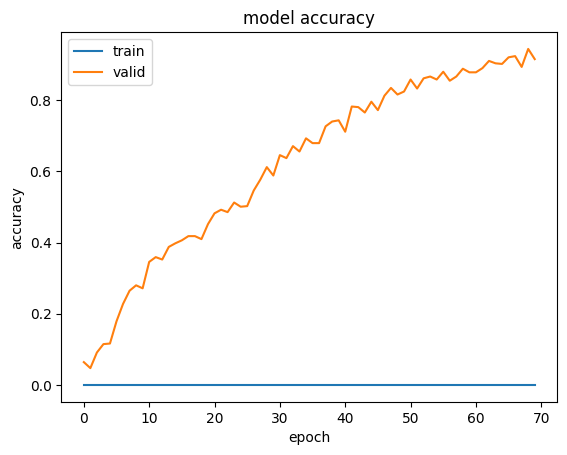

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

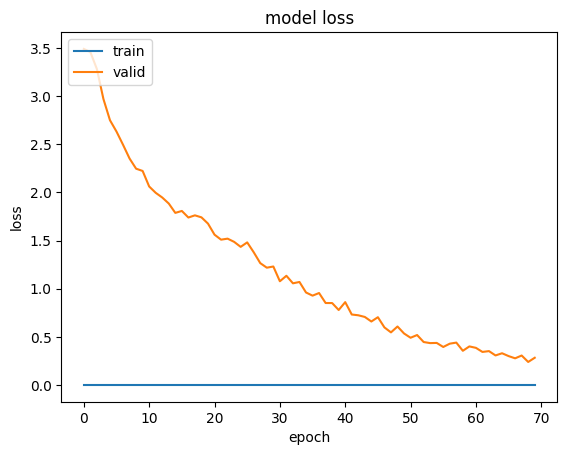

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [21]:
class_names = sorted(image_data_train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['A1L', 'A2L', 'A3L', 'Adl', 'Ael', 'Fal', 'Fbl', 'Fcl', 'Fdl',
       'Fel', 'Ffl', 'Fgl', 'Fhl', 'Fil', 'Fll', 'Fml', 'Gal', 'Gbl',
       'Gcl', 'Gdl', 'Ggl', 'Gzl', 'Nal', 'Nbl', 'Ncl', 'Ndl', 'Nel',
       'Nfl', 'Ngl', 'Nhl', 'Nil', 'Nll', 'Nml', 'New'], dtype='<U3')

In [22]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

1/1 [==============================] - 0s 198ms/step


In [23]:
label_id = np.argmax(label_batch, axis=-1)

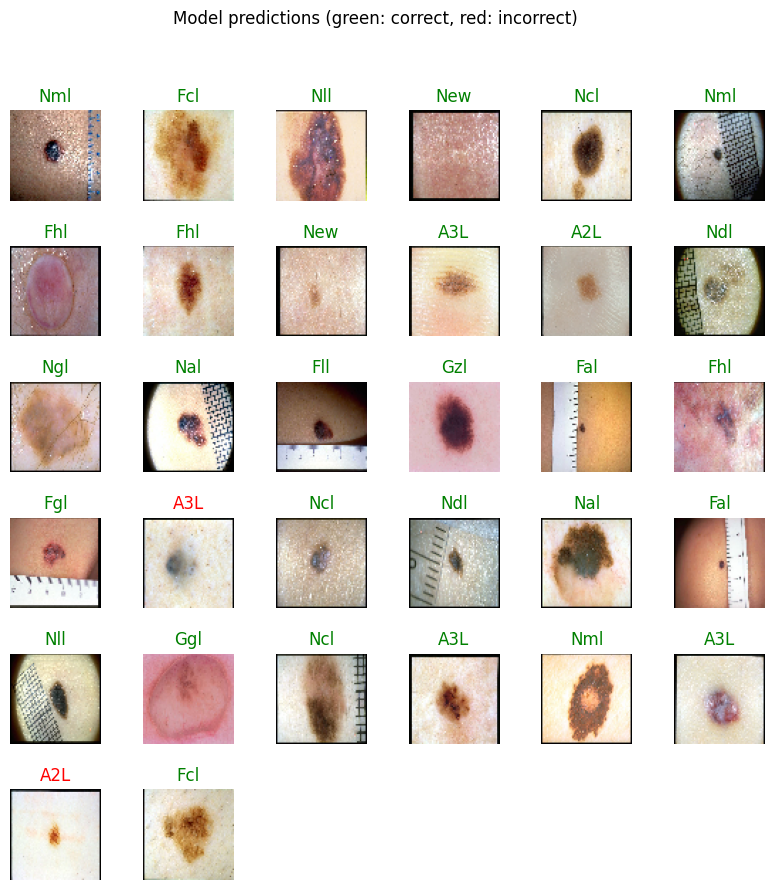

In [24]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(6,6,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [25]:
print(len(predicted_batch))
print(len(validation_image_generator))

32
19


In [26]:
cm = confusion_matrix(y_true=label_id,y_pred=(predicted_id))

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cm_plot_labels = []

Confusion matrix, without normalization
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


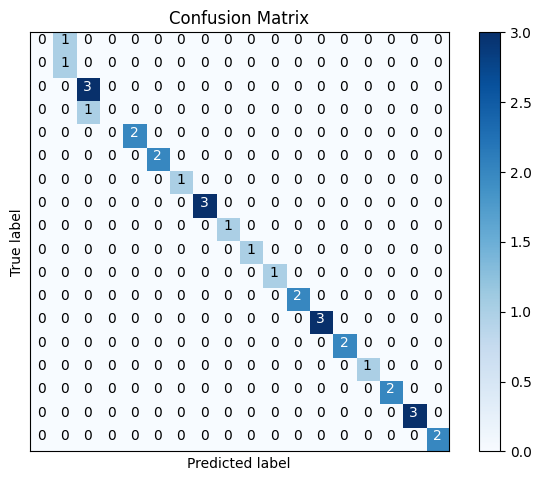

In [29]:
plot_confusion_matrix(cm=cm ,classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
print(classification_report(y_true=label_id,y_pred=(predicted_id)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         3
          25       1.00      1.00      1.00         2
          28       1.00      1.00      1.00         1
          31       1.00      1.00      1.00         2
          32       1.00      1.00      1.00         3
          33       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
